🚀 启动绘图 | 项目: RDKT | 模型: XGB


✅ 美图保存成功！
📂 保存路径: figures\Academic_Plot_XGB_RDKT_6.png


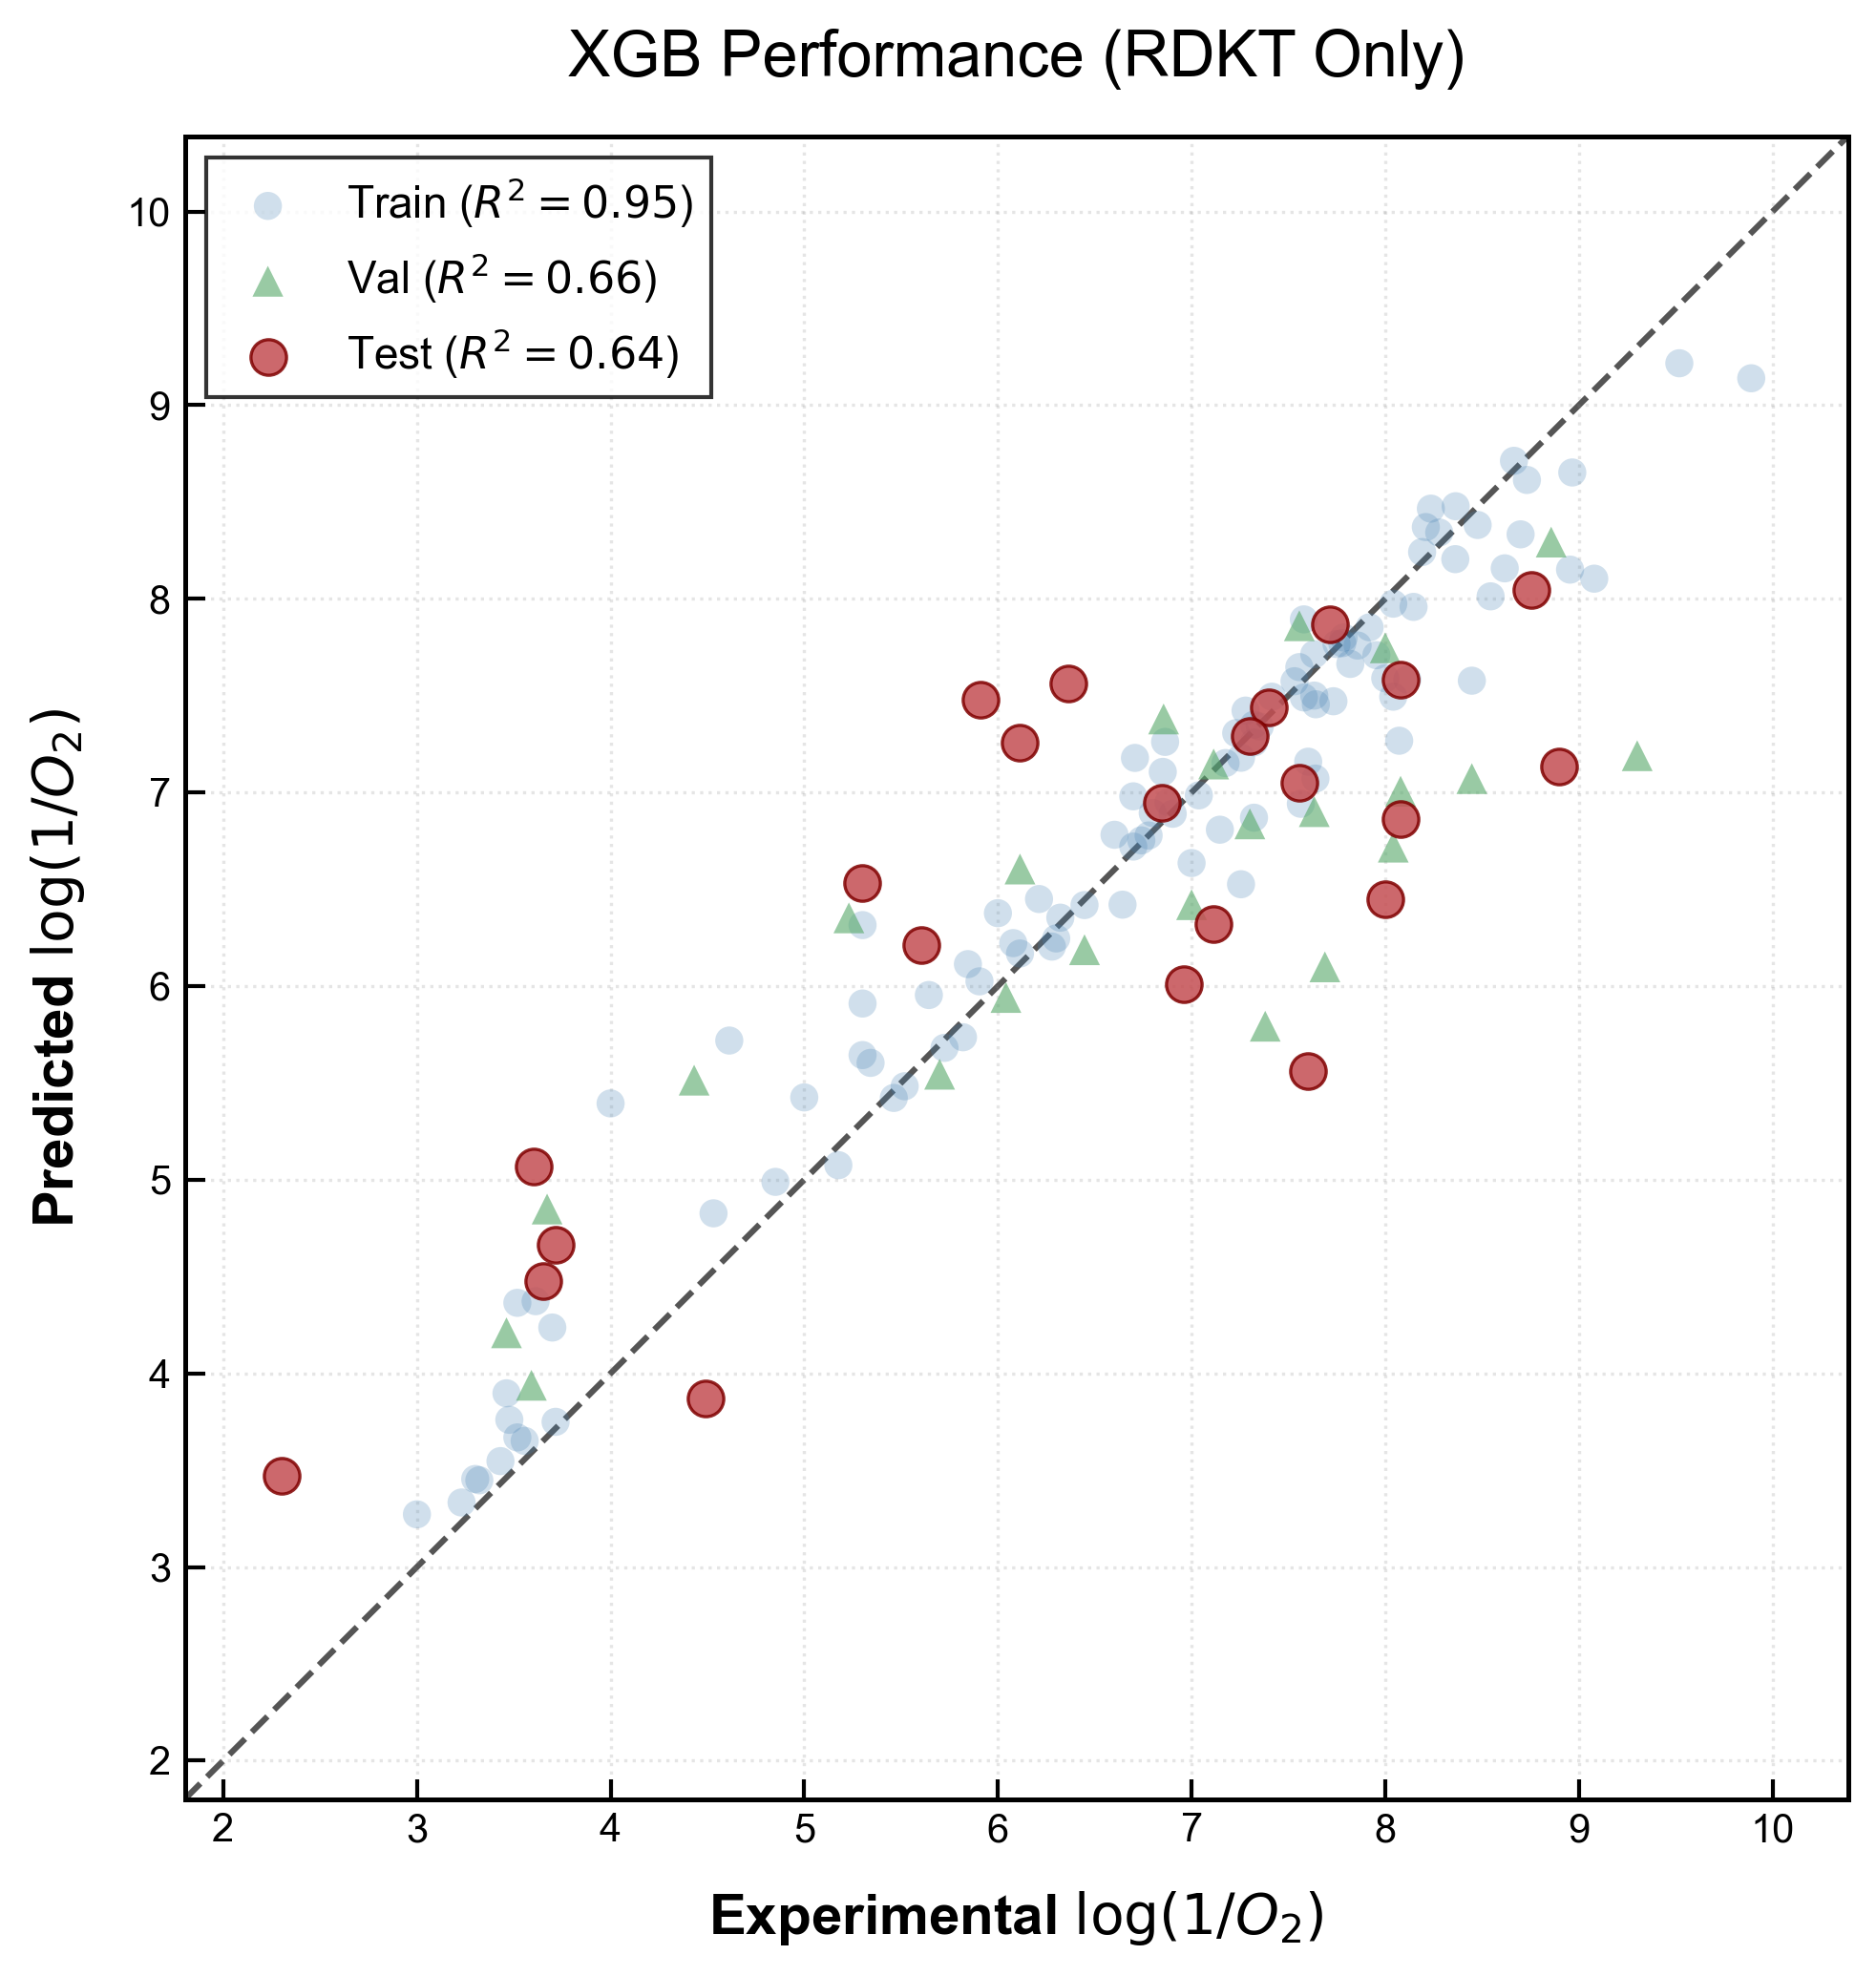

In [1]:
# ==========================================
# File: project_rdkt/notebooks/04_visualization.ipynb
# ==========================================

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# ========================================================
# 1. 环境准备 (完全参照 CDFT 逻辑)
# ========================================================
# 如果在 notebooks 文件夹里，就退回上一级 (项目根目录)
if 'notebooks' in os.getcwd(): os.chdir('..')
PROJECT_TAG = "RDKT"  # ★ RDKit 专属

# 读取指令
config_file = "current_model_config.txt"
if os.path.exists(config_file):
    with open(config_file, "r") as f:
        TARGET_MODEL = f.read().strip() # 如 "xgb"
else:
    TARGET_MODEL = "MANUAL"

print(f"🚀 启动绘图 | 项目: {PROJECT_TAG} | 模型: {TARGET_MODEL.upper()}")

# ========================================================
# 2. 读取数据 (Train/Val/Test)
# ========================================================
pred_dir = 'results/predictions' # 相对路径
try:
    df_train = pd.read_csv(os.path.join(pred_dir, 'train_predictions.csv'))
    df_val = pd.read_csv(os.path.join(pred_dir, 'val_predictions.csv'))
    df_test = pd.read_csv(os.path.join(pred_dir, 'final_predictions.csv'))
except FileNotFoundError:
    raise FileNotFoundError("❌ 找不到预测结果！请确认已运行 03 号文件且位于项目根目录下。")

# 提取数据
target_col = 'Target_Log1o2' if 'Target_Log1o2' in df_train.columns else 'Target'

y_train_true = df_train[target_col]; y_train_pred = df_train['Predicted']
y_val_true = df_val[target_col];     y_val_pred = df_val['Predicted']
y_test_true = df_test[target_col];   y_test_pred = df_test['Predicted']

# 计算指标
r2_tr = r2_score(y_train_true, y_train_pred)
r2_val = r2_score(y_val_true, y_val_pred)
r2_te = r2_score(y_test_true, y_test_pred)

# ========================================================
# 3. 绘图 (学术风格)
# ========================================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

fig, ax = plt.subplots(figsize=(7, 7), dpi=300)

all_vals = np.concatenate([y_train_true, y_val_true, y_test_true])
min_val, max_val = np.min(all_vals) - 0.5, np.max(all_vals) + 0.5
ax.set_xlim(min_val, max_val); ax.set_ylim(min_val, max_val)
ax.plot([min_val, max_val], [min_val, max_val], '--', color='#555555', linewidth=1.5, zorder=1)

# Train (钢蓝)
ax.scatter(y_train_true, y_train_pred, c='#4682B4', alpha=0.25, s=50, edgecolors='none', marker='o', label=f'Train ($R^2={r2_tr:.2f}$)', zorder=2)
# Val (鼠尾草绿)
ax.scatter(y_val_true, y_val_pred, c='#55A868', alpha=0.6, s=60, marker='^', edgecolors='none', label=f'Val ($R^2={r2_val:.2f}$)', zorder=3)
# Test (砖红)
ax.scatter(y_test_true, y_test_pred, c='#C44E52', alpha=0.85, s=80, edgecolors='#800000', linewidth=0.8, marker='o', label=f'Test ($R^2={r2_te:.2f}$)', zorder=4)

ax.set_xlabel('Experimental $\log(1/O_2)$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Predicted $\log(1/O_2)$', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title(f'{TARGET_MODEL.upper()} Performance ({PROJECT_TAG} Only)', fontsize=16, pad=15)

ax.grid(True, linestyle=':', alpha=0.2, color='gray')
ax.tick_params(direction='in', length=5, width=1, colors='black')
for spine in ax.spines.values(): spine.set_linewidth(1.2)
ax.legend(loc='upper left', fontsize=11, frameon=True, fancybox=False, edgecolor='black', framealpha=0.8)
ax.set_aspect('equal')

# ========================================================
# 4. 保存 (自动编号 + 相对路径 figures/)
# ========================================================
os.makedirs('figures', exist_ok=True)

# 基础文件名: Academic_Plot_XGB_RDKT
base_name = f"Academic_Plot_{TARGET_MODEL.upper()}_{PROJECT_TAG}"

# 搜索现有文件，找到最大编号 (使用 glob)
existing_files = glob.glob(f"figures/{base_name}_*.png")
max_num = 0
for f in existing_files:
    try:
        # 解析 _1.png, _2.png
        # split('_')[-1] 拿到 "1.png", split('.')[0] 拿到 "1"
        num = int(f.split('_')[-1].split('.')[0])
        if num > max_num: max_num = num
    except: pass

# 新文件名
save_name = f"{base_name}_{max_num + 1}.png"
save_path = os.path.join('figures', save_name)

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')

print("="*50)
print(f"✅ 美图保存成功！")
print(f"📂 保存路径: {save_path}")
print("="*50)

plt.show()